In [4]:
import pandas as pd
import networkx as nx

In [5]:
df = pd.read_csv('news.csv')

In [6]:
df.rename(columns={'Unnamed: 0': 'ID', 'class': 'label'}, inplace=True)
df.drop(['date'], axis=1, inplace=True)

In [7]:
df.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [8]:
sample = df[0:50]

In [9]:
sample.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [10]:
sample

,ID,news,subject,month,day,year,label
0,0,white house presses congress on bill allowing ...,politics,9,21,2016,1
1,1,china urges cooperation after us brands it a c...,politics,12,19,2017,1
2,2,cleveland school officer placed on leave afte...,politics,1,8,2016,0
3,3,syrian democratic forces say reach deir alzor ...,politics,9,10,2017,1
4,4,senator talks all night as democrats fight tru...,politics,4,5,2017,1
5,5,san francisco just told trump in no uncertain...,politics,12,3,2016,0
6,6,this is clinton’s supreme court plan and it c...,politics,3,28,2016,0
7,7,uk's johnson raises hackles over ww2 'punishme...,politics,1,18,2017,1
8,8,senate blocks democratic plan to expand gun ba...,politics,6,20,2016,1
9,9,mike rowe a lesson on liberty that everyone sh...,politics,7,4,2016,0


In [11]:
sample['label'].value_counts()

label
1    28
0    22
Name: count, dtype: int64

In [12]:
graph = nx.Graph()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_features = tfidf_vectorizer.fit_transform(sample['news'])

for idx, row in sample.iterrows():
    feature_tfidf_scores = tfidf_features[idx].toarray()[0]
    
    # Pair feature indices with their TF-IDF scores
    features_with_scores = list(enumerate(feature_tfidf_scores))
    
    # Sort the features based on their TF-IDF scores in descending order
    top_features = sorted(features_with_scores, key=lambda x: x[1], reverse=True)
    
    # Select the top 100 most prominent features
    necessary_features = top_features[:200]
    
    node_attrs = {
        'content': necessary_features,
        'month': row['month'],
        'day': row['day'],
        'year': row['year'],
    }
    graph.add_node(row['ID'], label=row['label'], **node_attrs)

In [14]:
for node, attrs in graph.nodes(data=True):
    print(f"Node {node}:")
    for attr_name, attr_value in attrs.items():
        print(f"{attr_name} : {attr_value}")

Node 0:
label : 1
content : [(4353, 0.32049218887911557), (1398, 0.24036914165933665), (980, 0.23742463348459217), (2045, 0.23126855153717768), (4465, 0.18501484122974216), (391, 0.16024609443955778), (3158, 0.16024609443955778), (3600, 0.16024609443955778), (2047, 0.1449172128697211), (2150, 0.1449172128697211), (3971, 0.1449172128697211), (3584, 0.14384272329010772), (2830, 0.1387611309223066), (2598, 0.1256051060251096), (1612, 0.11871231674229608), (2856, 0.11871231674229608), (3693, 0.11871231674229608), (4543, 0.10783630218470776), (2608, 0.1033834351724594), (3679, 0.09250742061487108), (3154, 0.09071213128019688), (5, 0.08012304721977889), (60, 0.08012304721977889), (145, 0.08012304721977889), (364, 0.08012304721977889), (1124, 0.08012304721977889), (1248, 0.08012304721977889), (1421, 0.08012304721977889), (1466, 0.08012304721977889), (2293, 0.08012304721977889), (2299, 0.08012304721977889), (2423, 0.08012304721977889), (2536, 0.08012304721977889), (2919, 0.08012304721977889), 

In [15]:
print(tfidf_features[6][0, 2129])

0.08344776063959557


In [23]:
for node, attrs in graph.nodes(data=True):
    if 'label' not in attrs:
        print(f"Node {node}")# Edges between same and different categories

In [24]:
import matplotlib.pyplot as plt

In [25]:
G1 = graph
G2 = graph 
G3 = graph 
G4 = graph

In [26]:
import numpy as np

In [56]:
label_colors = {
    1: 'green',
    0: 'yellow'
}

# Iterate through nodes and assign colors based on the 'label' attribute
node_colors = []
for node in G1.nodes():
    if 'label' in G1.nodes[node]:
        label = G1.nodes[node]['label']
        color = label_colors.get(label, 'gray')  # Default to gray for unknown labels
        node_colors.append(color)
    else:
        node_colors.append('gray')  # Default to gray for nodes without a 'label' attribute

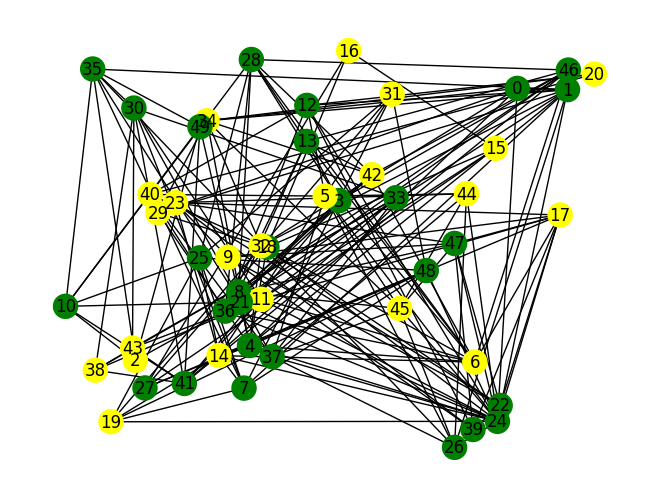

In [57]:
nx.draw_random(G1, with_labels=True, node_color=node_colors)
plt.show()

In [58]:
# COSINE SIMILARITY 

from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_features)
similarity_threshold = 0.1

for i in range(len(sample)):
    for j in range(i + 1, len(sample)):
        if similarity_matrix[i, j] > similarity_threshold:
            graph.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=similarity_matrix[i, j])



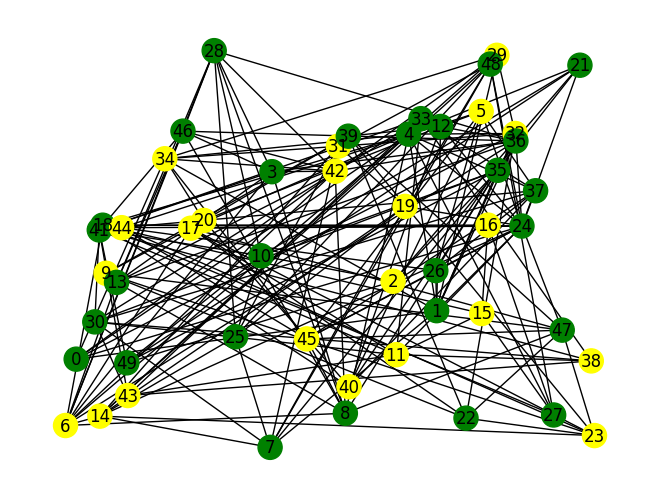

In [59]:
nx.draw_random(G2, with_labels=True, node_color=node_colors)
plt.show()

In [60]:
# JOCCARD SIMILARITY OF WORD SETS

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

for i in range(len(sample)):
    words_i = set(sample.iloc[i]['news'].split())
    for j in range(i + 1, len(sample)):
        words_j = set(sample.iloc[j]['news'].split())
        similarity = jaccard_similarity(words_i, words_j)
        if similarity > 0.2:
            G2.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=similarity)


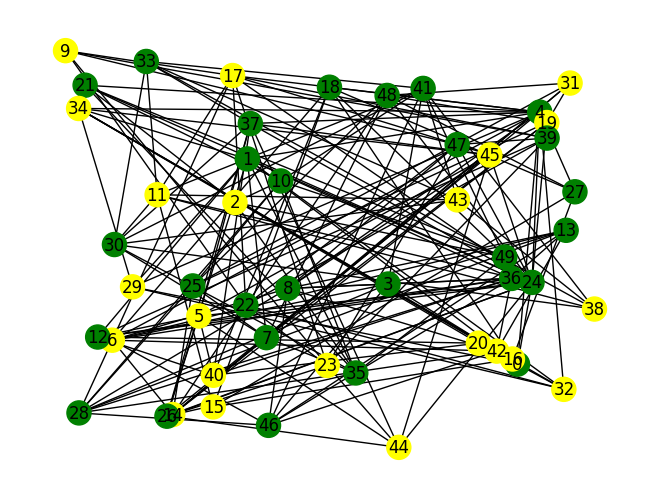

In [61]:
nx.draw_random(G3, with_labels=True, node_color=node_colors)
plt.show()

In [62]:
# TEMPORAL PROXIMITY
 
sample['date'] = pd.to_datetime(sample[['year', 'month', 'day']])
time_threshold = pd.Timedelta(days=7)

def dayscalc(date1, date2):
    delta = date2 - date1
    return abs(delta.days)

for i in range(len(sample)):
    date_i = sample.iloc[i]['date']
    for j in range(i + 1, len(sample)):
        date_j = sample.iloc[j]['date']
        if abs((date_j - date_i).days) <= time_threshold.days:
            G3.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=dayscalc(date_i, date_j))


C:\Users\manis\AppData\Local\Temp\ipykernel_13620\403620347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['date'] = pd.to_datetime(sample[['year', 'month', 'day']])


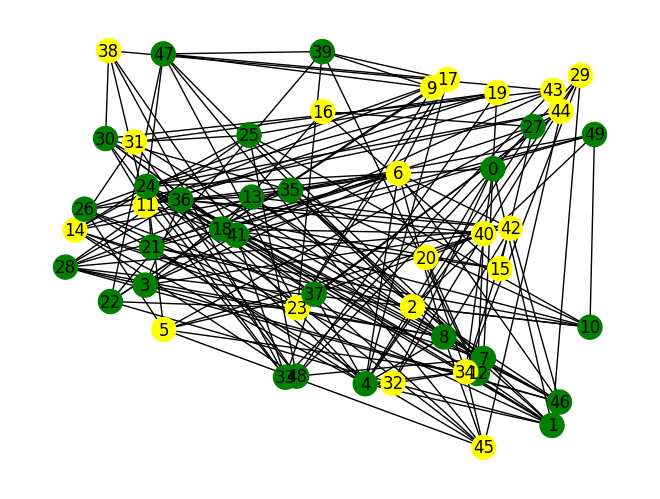

In [64]:
nx.draw_random(G3, with_labels=True, node_color=node_colors)
plt.show()

In [65]:
# TOPIC MODELING SIMILARITY

from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_features = lda.fit_transform(tfidf_features)

from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(lda_features)
similarity_threshold = 0.9

for i in range(len(sample)):
    for j in range(i + 1, len(sample)):
        if similarity_matrix[i, j] > similarity_threshold:
            G4.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=similarity_matrix[i, j])


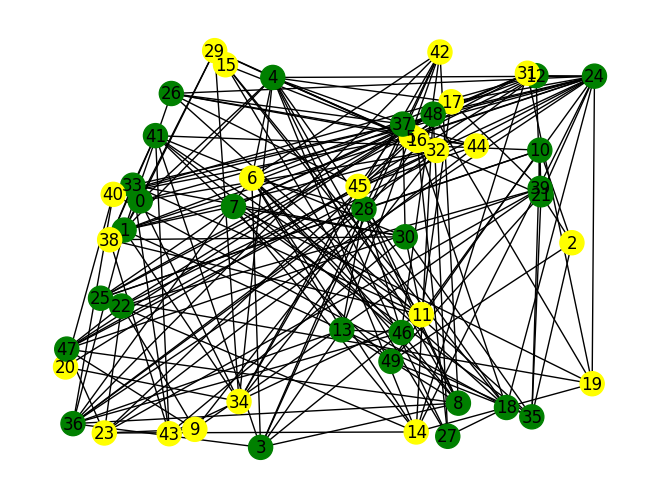

In [66]:
nx.draw_random(G4, with_labels=True, node_color=node_colors)
plt.show()

# Model Building

In [67]:
import torch
from torch_geometric.utils import from_networkx

# Convert NetworkX graph to PyTorch Geometric Data object
data = from_networkx(graph)

# Check if the conversion is successful
print(data)

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data(edge_index=[2, 366], label=[50], content=[50, 200, 2], month=[50], day=[50], year=[50], weight=[366], num_nodes=50)
